In [7]:
!unzip /content/dataset.zip -d /content

Archive:  /content/dataset.zip
   creating: /content/dataset/images/
   creating: /content/dataset/images/test/
  inflating: /content/dataset/images/test/test_img_0001.jpg  
  inflating: /content/dataset/images/test/test_img_0002.jpg  
  inflating: /content/dataset/images/test/test_img_0003.jpg  
  inflating: /content/dataset/images/test/test_img_0004.jpg  
  inflating: /content/dataset/images/test/test_img_0005.jpg  
  inflating: /content/dataset/images/test/test_img_0006.jpg  
  inflating: /content/dataset/images/test/test_img_0007.jpg  
  inflating: /content/dataset/images/test/test_img_0008.jpg  
  inflating: /content/dataset/images/test/test_img_0009.jpg  
  inflating: /content/dataset/images/test/test_img_0010.jpg  
  inflating: /content/dataset/images/test/test_img_0011.jpg  
  inflating: /content/dataset/images/test/test_img_0012.jpg  
  inflating: /content/dataset/images/test/test_img_0013.jpg  
  inflating: /content/dataset/images/test/test_img_0014.jpg  
  inflating: /conten

In [8]:
!pip install ultralytics
from ultralytics import YOLO

In [9]:
data_yaml = """
path: /content/dataset
train: images/train
val: images/valid
test: images/test
names:
  0: face
"""

with open("/content/dataset/data.yaml", "w") as f:
    f.write(data_yaml)

In [11]:
# YOLOv5 학습 스크립트 실행 방식
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 10 \
  --data /content/dataset/data.yaml \
  --weights yolov5s.pt \
  --name yolov5_custom \
  --patience 20


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-17 21:04:20.716104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750194260.743977   11137 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750194260.754589   11137 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/content/dataset/data.yaml, hyp=data/hyp

In [12]:
!pip install ultralytics

In [22]:
import shutil

# ✅ 1. best.pt 파일을 /content로 복사
shutil.copy("runs/train/yolov5_custom2/weights/best.pt", "/content/best.pt")

# ✅ 2. 테스트할 이미지 경로 지정 (경로에 맞게 수정)
test_img_path = "/content/dataset/images/test/test_img_0002.jpg"  # ← 실제 파일명으로 변경

# ✅ 3. detect.py 실행하여 추론
!python detect.py \
  --weights /content/best.pt \
  --source "{test_img_path}" \
  --conf 0.25 \
  --save-txt \
  --name infer_result \
  --exist-ok


detect: weights=['/content/best.pt'], source=/content/dataset/images/test/test_img_0002.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=infer_result, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/images/test/test_img_0002.jpg: 384x640 1 face, 40.5ms
Speed: 0.5ms pre-process, 40.5ms inference, 179.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/infer_result
1 labels saved to runs/detect/infer_result/labels


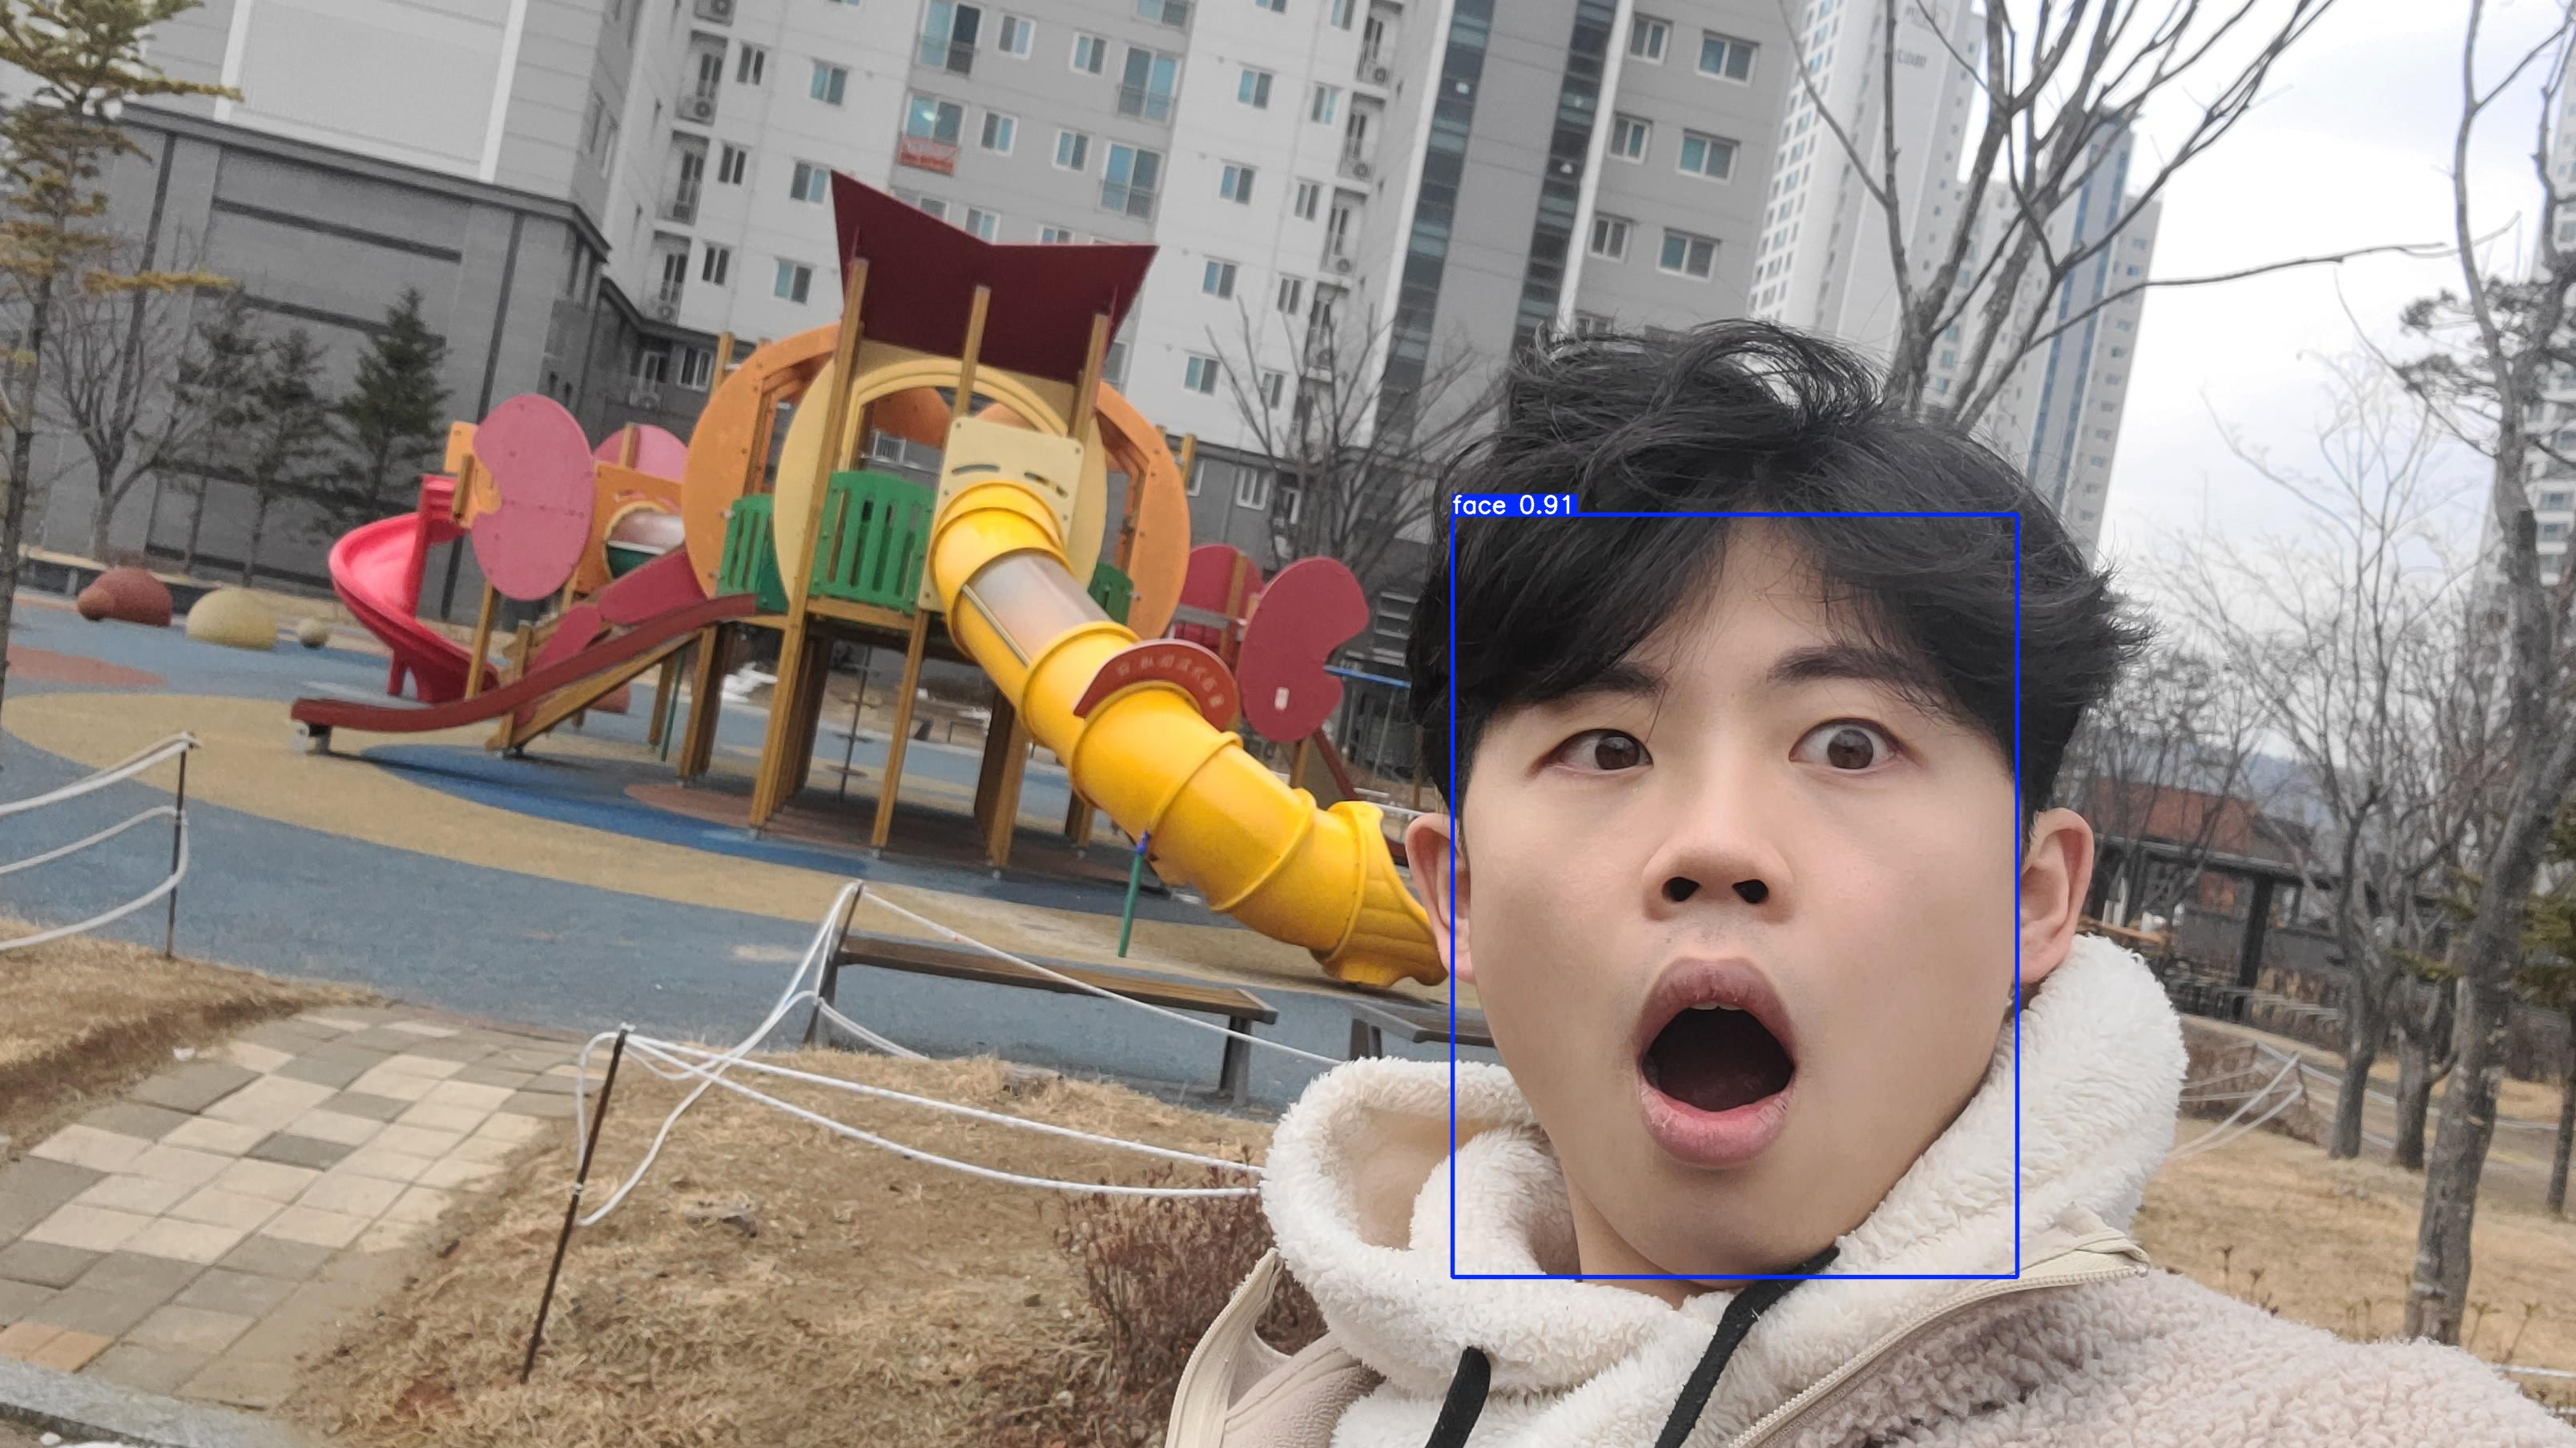

In [23]:
from IPython.display import Image, display
from pathlib import Path

# 결과 이미지 경로 구성 및 출력
result_img_path = Path("runs/detect/infer_result") / Path(test_img_path).name
display(Image(filename=result_img_path))
